# Euler方法

根据后向差分公式:  $y'(x_k) \approx \frac{y(x_{k+1})-y(x_{k})}{x_{k+1}-x_{k}}$

可得 $y(x_{k+1}) = y(x_{k}) + \Delta x * y'(x_{k})$, 其中用 h 表示步长 $\Delta x$

也可以认为是泰勒公式展开

例题
> $y=-100y',0≤x≤0.1,y(0)=1$, 分别取 $h=0.025$ 用Euler方法求其数值解并与其准确解作比较。

In [15]:
from math import exp

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文


def euler(x, b, y, h, f):
    result = {x: y}
    while True:
        if x >= b:
            break
        y = y + h * f(x, y)
        x = x + h
        result[x] = y
    return result

In [20]:
def y_grad(x, y):
    return -100 * y


x0 = 0
b = 0.1
y0 = 1
h = 0.015
xydict = euler(x0, b, y0, h, y_grad)

## 实际精确表达式

In [21]:
def actual_f(x):
    return exp(-100 * x)

## 实际值和数值解之间的差距

> 可以修改h=0.025, h=0.015, h = 0.01进行测试

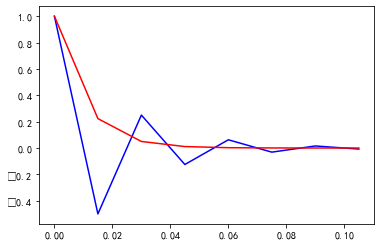

In [22]:
plt.plot(xydict.keys(), xydict.values(), 'b-')

plt.plot(xydict.keys(), [actual_f(x) for x in xydict.keys()], 'r-')

plt.show()

# 稳定性

据稳定性定义，要想 $|e_{k+1}|≤|e_{k}|$, 只须 $|1+\lambda h|≤1$

使用Euler方法需要满足步长 $h$ 的取值在稳定区间内

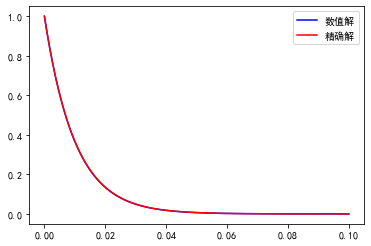

In [19]:
def y_grad(x, y):
    return -100 * y


x0 = 0
b = 0.1
y0 = 1
h = 0.0001
xydict = euler(x0, b, y0, h, y_grad)

plt.plot(xydict.keys(), xydict.values(), 'b-', label='数值解')

plt.plot(xydict.keys(), [actual_f(x) for x in xydict.keys()], 'r-', label='精确解')

plt.legend()
plt.show()